1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to graphically display the regions.
* Use `scipy.optimize.minimize()`, trying its optional arguments.

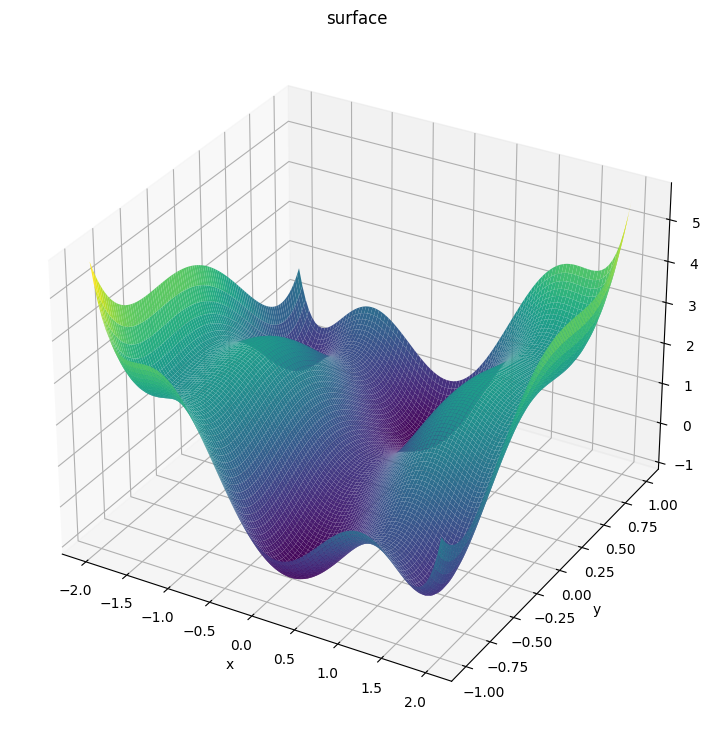

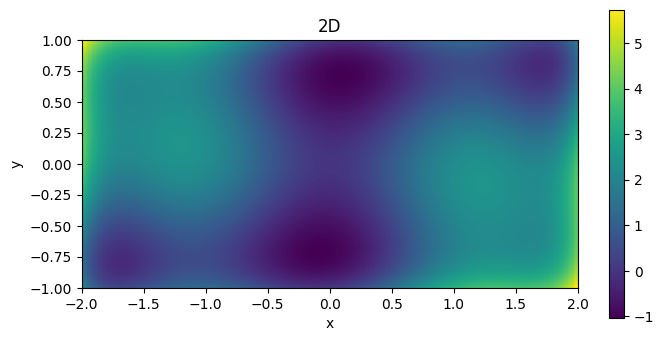

Minimum:  [ 0.08984202 -0.71265632] , The value is: = -1.0316284534898141
Minimum:  [-0.08984203  0.7126563 ] , The value is:  -1.031628453489791
Minimum:  [0. 0.] , The value is:  0.0




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.fft import fft, fftfreq
from scipy.integrate import odeint
from scipy import fftpack
import scipy
import matplotlib.pyplot as plt

# Define the function
def f(x, y):
    return (4 - 2.1*x**2 + x**4/3)*x**2 + x*y + (4*y**2 - 4) * y**2

minx, maxx, sizex = -2, 2, 100
miny, maxy, sizey= -1, 1, 100
x = np.linspace(minx, maxx, sizex)
y = np.linspace(miny, maxy, sizey)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 3D print
fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# 2D Print
fig = plt.figure(figsize=(8,4))
plt.title('2D')
plt.imshow(Z, extent = [minx, maxx,miny, maxy])
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

# Redefine the function with a vector as input
def f_(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + 4*x[1]**2) * x[1] **2)
    
# Way 1:
#print(s1)
s1 = optimize.minimize(f_, x0 = (0,-1))
print("Minimum: ", s1['x'],", The value is: =",s1['fun'])
s2 = optimize.minimize(f_, x0 = (0,1))
print("Minimum: ", s2['x'],", The value is: ",s2['fun'])


# For (0,0)
s1 = optimize.minimize(f_, x0 = (0,0))
print("Minimum: ", s1['x'],", The value is: ",s1['fun'])
# We get (0,0), we find a local minimum
"""
# We could otherwise do it in another way:
lower = np.random.uniform(-2, 2, 100)
upper = lower + 1
solutions = optimize.minimize(f, [1,1] ; [1,1]])
#solutions = [optimize.minimize(f, args=(5,), bracket=(l, u)) for (l, u) in zip(lower, upper)]
# split the x range in intervals, and run minimize_scalar in each one, then pick the interval with the smallest minimum
idx = np.argmin([solution['fun'] for solution in solutions])
solution = solutions[idx]

fig = plt.figure()
plt.plot(x, f(x, y))
plt.axvline(solution['x'], color='r')
plt.show()
"""
print("\n")

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion of a forced pendulum, as a function of the angle $\theta$ with the vertical, is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \frac{g}{l}\sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs by defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \frac{g}{l}\sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $l = 10$, $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a period of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

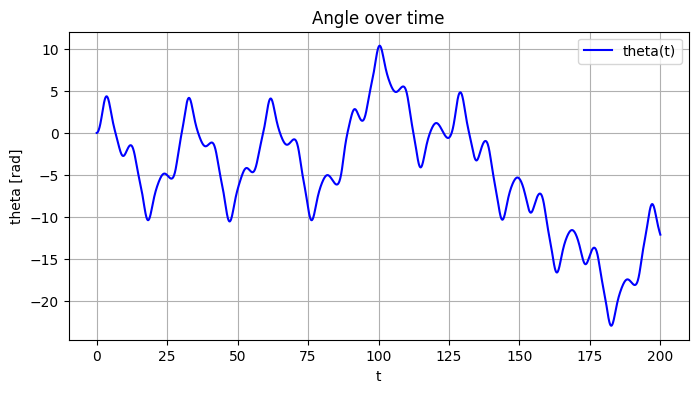

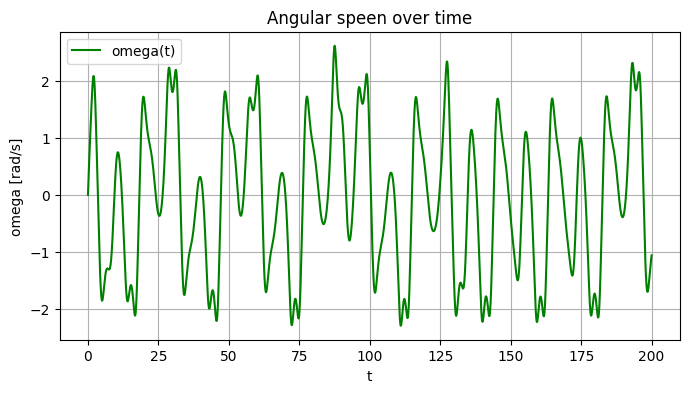

In [2]:
# Define the ODE
def pend(y, t, Q, d, Omega):
    theta, omega = y
    dydt = [omega, -1/Q*omega + np.sin(theta) + d*np.cos(Omega*t)]
    return dydt

# Initial conditions
theta0 = 0
omega0 = 0
y0 = [theta0, omega0]
Q = 2.0
d = 1.5
Omega =0.65
t = np.linspace(0, 200, 2000)
#Computing the solutions
sol = odeint(pend, y0, t, args=(Q, d, Omega))

# Plotting the solutions
fig = plt.figure(figsize=(8,4))
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('theta [rad]')
plt.title('Angle over time')
plt.grid()
plt.show()

fig = plt.figure(figsize=(8,4))
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('omega [rad/s]')
plt.title('Angular speen over time')
plt.grid()
plt.show()
# Testing with other initial condition there is no cahotic

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one downloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

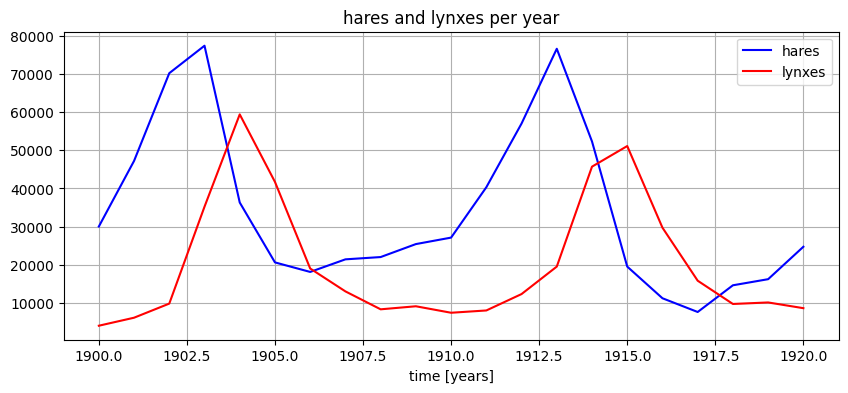

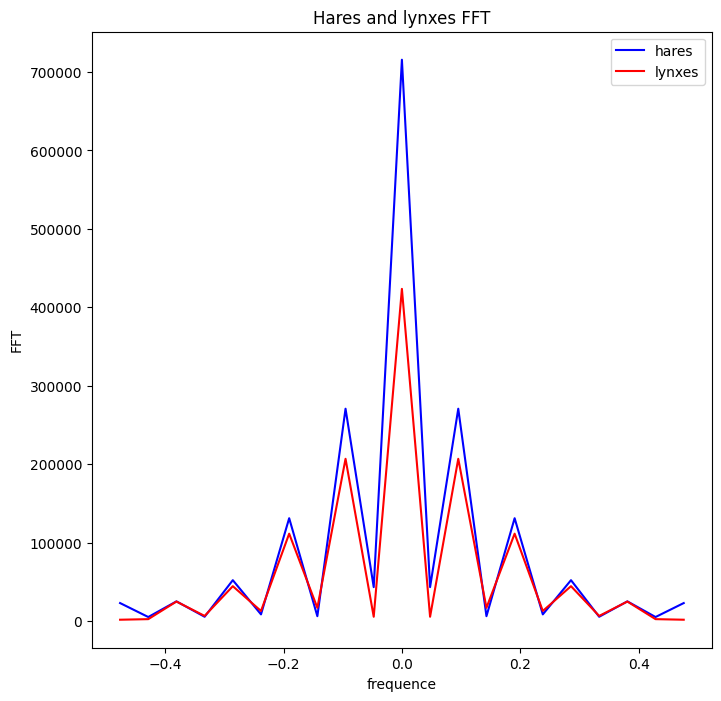

Peak frequency:  0.09523809523809523
Peak frequency:  0.09523809523809523
Period:  10.5
Period:  10.5


In [5]:
data = np.loadtxt('./data/populations.txt')
year, hares, lynxes, carrots = data.T

fig = plt.figure(figsize=(10, 4))
plt.plot(year, hares, 'b', label="hares" )
plt.plot(year, lynxes,'r', label="lynxes" ) 
plt.legend( loc="best")
plt.xlabel('time [years]')
plt.title('hares and lynxes per year')
plt.grid()
plt.show()

hares_tran = fft(hares)
lynxes_tran = fft(lynxes)

#Compute the frequency axis:
hares_freq = fftfreq(len(hares_tran),1)
lynxes_freq = fftfreq(len(lynxes_tran),1)

#hares = np.array([hares_tran, hares_freq])
#print(hares[0, :])
#hares = np.sort(hares, axis =1, dtype=float)
#print(hares)

fig1 = plt.figure(figsize=(8,8))
plt.plot(fftpack.fftshift(hares_freq), abs(fftpack.fftshift(hares_tran)), 'b', label="hares" )
plt.plot(fftpack.fftshift(lynxes_freq), abs(fftpack.fftshift(lynxes_tran)),'r', label="lynxes" )
plt.title('Hares and lynxes FFT')
plt.xlabel('frequence')
plt.ylabel('FFT')
plt.legend( loc="best")
plt.show()

pos_mask = np.where(hares_freq > 0)
hfreqs = hares_freq[pos_mask]
lfreqs = lynxes_freq[pos_mask]
hpower = np.abs(hares_tran)
lpower = np.abs(lynxes_tran)
hpowes = hpower[pos_mask]
lpowes = lpower[pos_mask]

# find the max of freqs array
peak_freq_h = hfreqs[hpowes.argmax()]
peak_freq_l = lfreqs[lpowes.argmax()]

print("Peak frequency: ", peak_freq_h)
print("Peak frequency: ", peak_freq_l)
hperiod = 1/peak_freq_h
lperiod = 1/peak_freq_l
print("Period: ",hperiod)
print("Period: ",lperiod)
# So the period is 10.5 years, so it is 10 years and 6 months

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the 2D regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

474
630


Text(0.5, 1.0, 'Reconstructed Image')

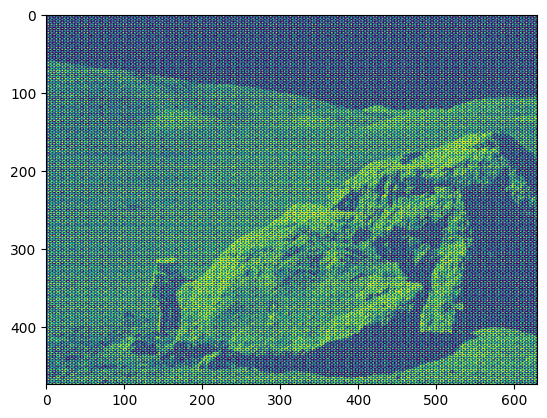

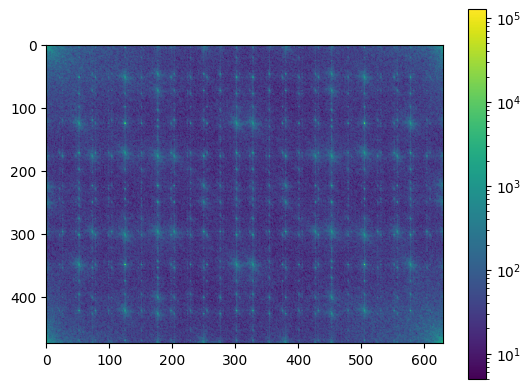

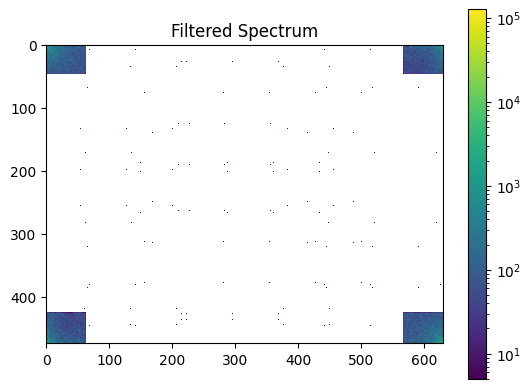

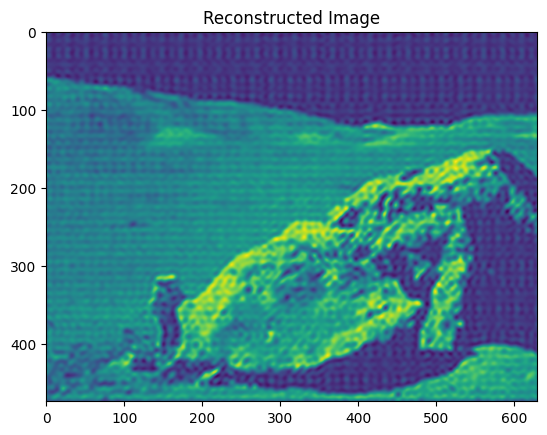

In [7]:
from matplotlib.colors import LogNorm
image = plt.imread("data/moonlanding.png")

fig = plt.figure()
plt.imshow(image)

image_fft = fftpack.fft2(image)

fig = plt.figure()
plt.imshow(abs(image_fft), norm=LogNorm(vmin=5))
plt.colorbar()

keep_fraction = 0.1
r, c = image_fft.shape
print(r)
print(c)

# We take only the squares at the limit of the spectum, where it seems to be less noise
image_fft[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
image_fft[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plt.imshow(abs(image_fft), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Filtered Spectrum')


im_new = fftpack.ifft2(image_fft).real

plt.figure()
plt.imshow(im_new)
plt.title('Reconstructed Image')